In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import math
from scipy import stats
import time

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
file_dir = 'E:\\Ising_model_results_daai'

In [4]:
training_index_start = 0
training_index_end = 670

In [5]:
def depytorch(t:torch.Tensor):
    return t.detach().cpu().numpy()

In [6]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist(  depytorch( values.flatten() )  )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

In [7]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [8]:
def make_scatter(xname:str, xvalues:torch.Tensor, yname:str, yvalues:torch.Tensor, do_log_log:bool=False, save:bool=False, file_name:str=None):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.scatter(  depytorch( xvalues.flatten() ), depytorch( yvalues.flatten() )  )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    if do_log_log:
        axs.set_xscale('log')
        axs.set_yscale('log')
    axs.set_xlabel(xname)
    axs.set_ylabel(yname)
    # axs.set_title(f'{xname} vs {yname}')
    plt.show()
    if save:
        plt.savefig(file_name)

In [9]:
def show_square(values:torch.Tensor, width:int=10, height:int=10):
    fig, axs = plt.subplots( nrows=1, ncols=1, figsize=(width, height) )
    cbax = axs.imshow( depytorch(values) )
    fig.colorbar(cbax, shrink=0.8)

In [ ]:
file_suffix = 'pseudolikelihood_mean_std_1_models_5_rand_min_-100_max_100_lr_0.001_steps_1000000'
h = torch.load( f=os.path.join(file_dir, f'h_{file_suffix}.pt') )
print( 'h size', h.size() )
J = torch.load( f=os.path.join(file_dir, f'J_{file_suffix}.pt') )
print( 'J size', J.size() )

In [11]:
h_std, h_mean = torch.std_mean(h, dim=0)

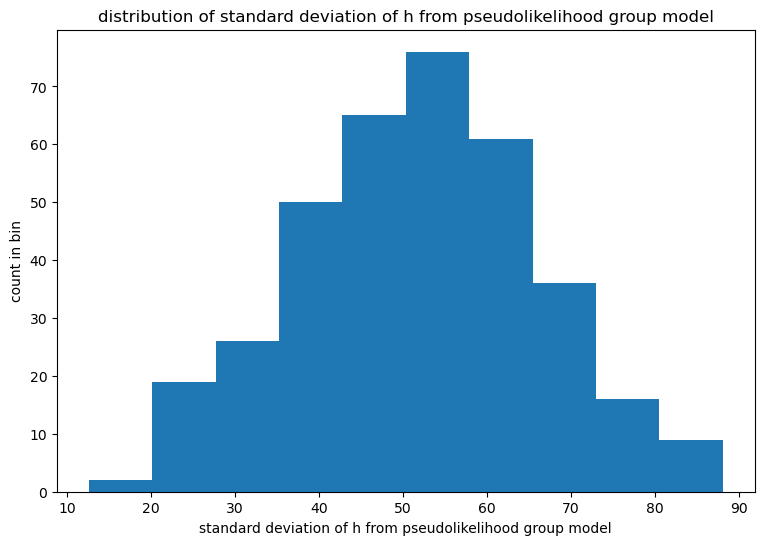

The distribution of standard deviation of h from pseudolikelihood group model values has median 52 with 95% CI [24.3, 80.1] and range [12.6, 88.1].


In [12]:
values = h_std
name='standard deviation of h from pseudolikelihood group model'
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

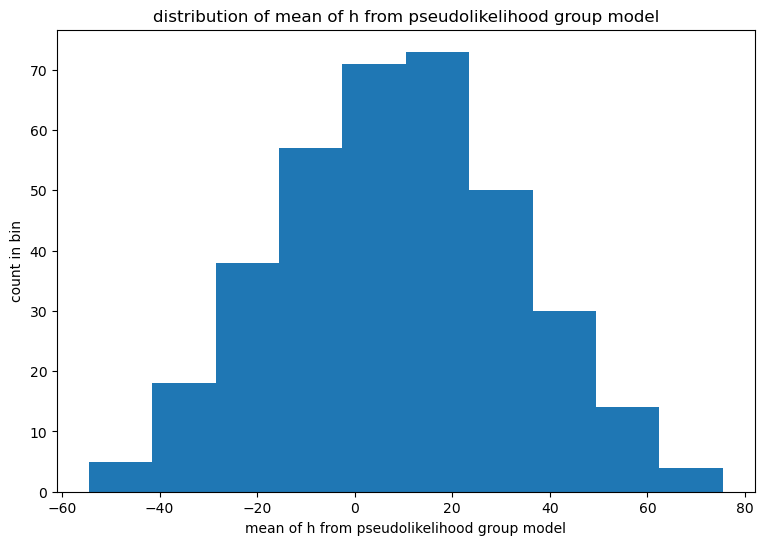

The distribution of mean of h from pseudolikelihood group model values has median 8.35 with 95% CI [-37.2, 55.3] and range [-54.5, 75.4].


In [13]:
values = h_mean
name='mean of h from pseudolikelihood group model'
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

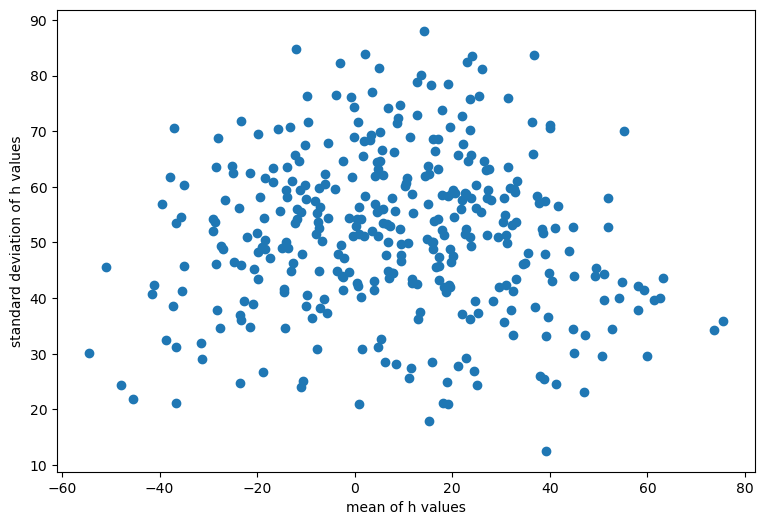

correlation between mean and standard deviation of h values: -0.0327


In [25]:
make_scatter(xname='mean of h values', xvalues=h_mean, yname='standard deviation of h values', yvalues=h_std)
print(   f'correlation between mean and standard deviation of h values: {torch.corrcoef(  torch.stack( (h_mean, h_std), dim=0 )  )[0,1]:.3g}'   )

In [27]:
J_std, J_mean = torch.std_mean(J, dim=0)
J_std = J_std.flatten()
J_mean = J_mean.flatten()

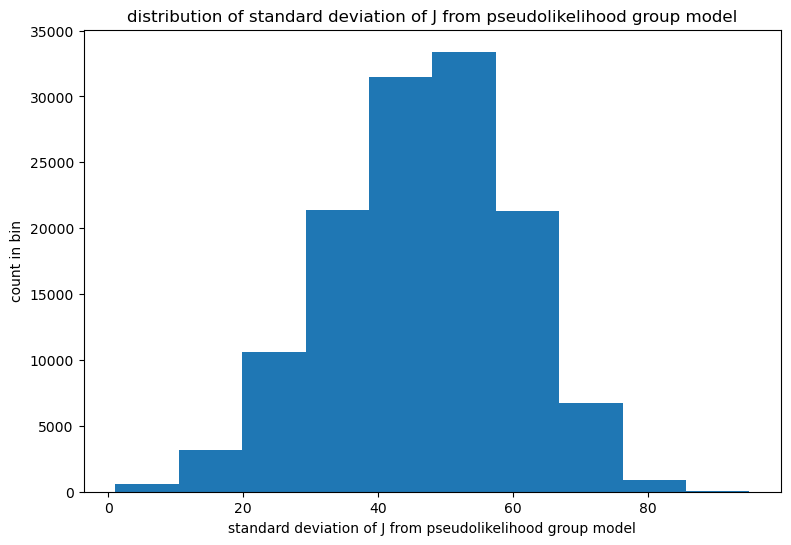

The distribution of standard deviation of J from pseudolikelihood group model values has median 47.4 with 95% CI [19, 71.2] and range [1.07, 95].


In [28]:
values = J_std
name='standard deviation of J from pseudolikelihood group model'
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

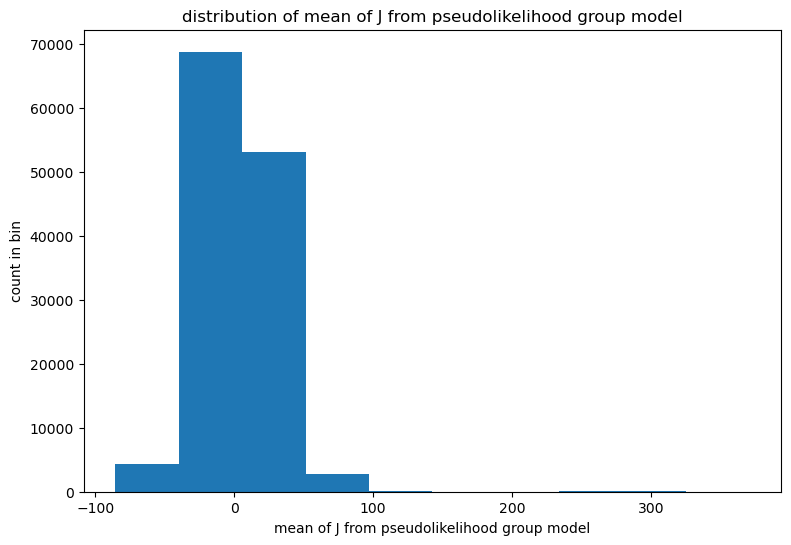

The distribution of mean of J from pseudolikelihood group model values has median 1.95 with 95% CI [-42.5, 51.5] and range [-85.5, 371].


In [29]:
values = J_mean
name='mean of J from pseudolikelihood group model'
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

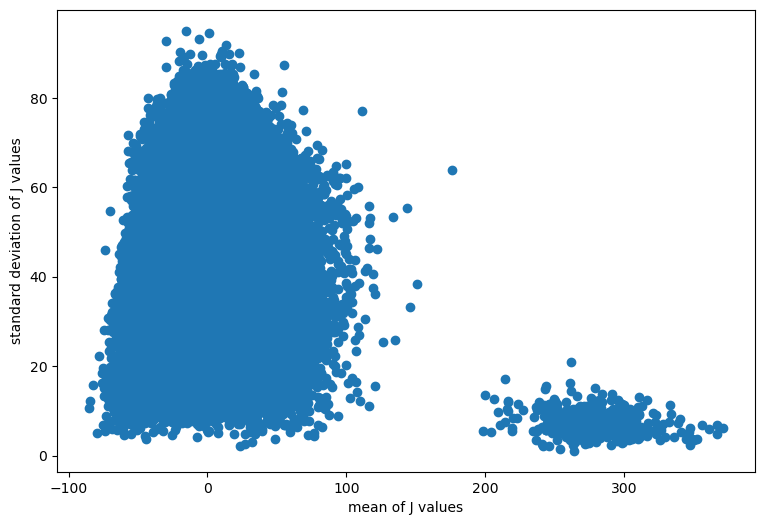

correlation between mean and standard deviation of J values: -0.0993


In [30]:
make_scatter(xname='mean of J values', xvalues=J_mean, yname='standard deviation of J values', yvalues=J_std)
print(   f'correlation between mean and standard deviation of J values: {torch.corrcoef(  torch.stack( (J_mean, J_std), dim=0 )  )[0,1]:.3g}'   )

In [34]:
num_reps = h.size(dim=0)
triu_ind = torch.triu_indices( row=num_reps, col=num_reps, offset=1, dtype=int_type, device=h.device )
print( f'correlations between h values of the same region' )
print( torch.corrcoef(h) )
print( f'correlations between h values of the same region' )
print( torch.corrcoef(h)[ triu_ind[0], triu_ind[1] ] )

correlations between h values of the same region
tensor([[ 1.0000,  0.0708,  0.0541,  0.0784,  0.0064],
        [ 0.0708,  1.0000,  0.0126, -0.0728, -0.0390],
        [ 0.0541,  0.0126,  1.0000, -0.0724, -0.0083],
        [ 0.0784, -0.0728, -0.0724,  1.0000,  0.0302],
        [ 0.0064, -0.0390, -0.0083,  0.0302,  1.0000]], device='cuda:0')
correlations between h values of the same region
tensor([ 0.0708,  0.0541,  0.0784,  0.0064,  0.0126, -0.0728, -0.0390, -0.0724,
        -0.0083,  0.0302], device='cuda:0')


In [36]:
J_flat = J.flatten(start_dim=1, end_dim=2)
num_reps = J_flat.size(dim=0)
triu_ind = torch.triu_indices( row=num_reps, col=num_reps, offset=1, dtype=int_type, device=h.device )
print( f'correlations between J values of the same region' )
print( torch.corrcoef(J_flat) )
print( f'correlations between J values of the same region' )
print( torch.corrcoef(J_flat)[ triu_ind[0], triu_ind[1] ] )

correlations between J values of the same region
tensor([[1.0000, 0.1168, 0.1161, 0.1146, 0.1133],
        [0.1168, 1.0000, 0.1145, 0.1140, 0.1142],
        [0.1161, 0.1145, 1.0000, 0.1151, 0.1172],
        [0.1146, 0.1140, 0.1151, 1.0000, 0.1141],
        [0.1133, 0.1142, 0.1172, 0.1141, 1.0000]], device='cuda:0')
correlations between J values of the same region
tensor([0.1168, 0.1161, 0.1146, 0.1133, 0.1145, 0.1140, 0.1142, 0.1151, 0.1172,
        0.1141], device='cuda:0')


In [11]:
states_float = 2 * torch.load( os.path.join(file_dir,f'data_states_mean_std_1.pt') ).float() - 1
print( states_float.size(), states_float.dtype )

torch.Size([2844545, 360]) torch.float32


In [12]:
# states_float = states.float() - torch.logical_not(states).float()

In [48]:
num_reps = h.size(dim=0)
num_states = states_float.size(dim=0)
log_pl_probs = torch.zeros( (num_reps,num_states), dtype=float_type, device=device )
states_in_cols = states_float.unsqueeze(dim=-1)
J_with_batch_dim = J.unsqueeze(dim=1)
h_in_cols = h.unsqueeze(dim=1).unsqueeze(dim=-1)
states_in_rows = states_float.unsqueeze(dim=-2)
for rep_index in range(num_reps):
    log_pl_probs[rep_index,:] = 0.5*torch.matmul( states_in_rows, 2*h_in_cols[rep_index,:,:,:] + torch.matmul(J_with_batch_dim[rep_index,:,:,:], states_in_cols) ).flatten()
print( log_pl_probs.size(), log_pl_probs.min(), log_pl_probs.mean(), log_pl_probs.max() )

torch.Size([5, 2844545]) tensor(33367.3398, device='cuda:0') tensor(155343.7500, device='cuda:0') tensor(215498.7500, device='cuda:0')


In [12]:
state_counts = torch.load( f=os.path.join(file_dir,f'group_data_counts_mean_std_1.pt') )
state_counts_float = state_counts.float()
log_state_counts = state_counts_float.log()
print( log_state_counts.size(), log_state_counts.min(), log_state_counts.mean(), log_state_counts.max() )
state_probs = state_counts_float/state_counts_float.sum(dim=-1, keepdim=True)
print( state_probs.size(), state_probs.min(), state_probs.mean(), state_probs.max() )

torch.Size([2844545]) tensor(0., device='cuda:0') tensor(0.0205, device='cuda:0') tensor(11.8214, device='cuda:0')
torch.Size([2844545]) tensor(3.1095e-07, device='cuda:0') tensor(3.5155e-07, device='cuda:0') tensor(0.0423, device='cuda:0')


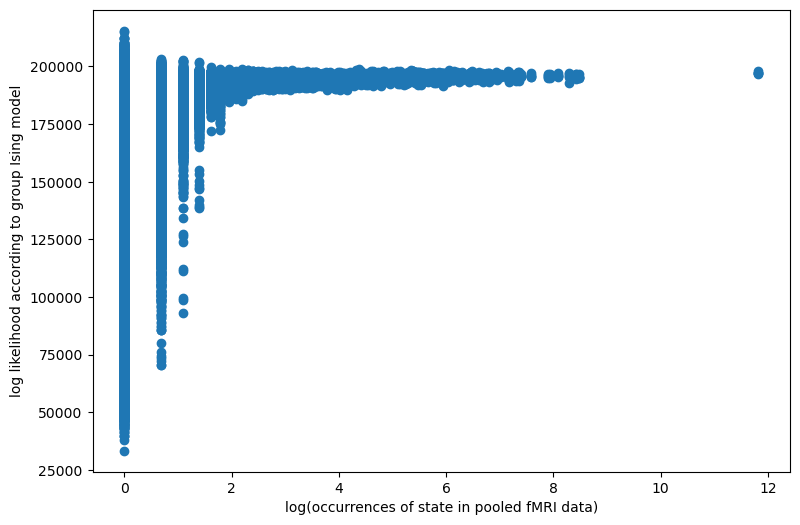

correlation between Ising model entropies and frequencies in data in log-log space
tensor([[1.0000, 0.1671, 0.1673, 0.1678, 0.1671, 0.1673],
        [0.1671, 1.0000, 0.9667, 0.9678, 0.9656, 0.9684],
        [0.1673, 0.9667, 1.0000, 0.9675, 0.9675, 0.9681],
        [0.1678, 0.9678, 0.9675, 1.0000, 0.9690, 0.9675],
        [0.1671, 0.9656, 0.9675, 0.9690, 1.0000, 0.9673],
        [0.1673, 0.9684, 0.9681, 0.9675, 0.9673, 1.0000]], device='cuda:0')


In [49]:
make_scatter( xname='log(occurrences of state in pooled fMRI data)', xvalues=log_state_counts.unsqueeze(dim=0).repeat((num_reps,1)), yname='log likelihood according to group Ising model', yvalues=log_pl_probs )
print(   f'correlation between Ising model entropies and frequencies in data in log-log space'   )
print(    torch.corrcoef(   torch.cat(  ( log_state_counts.unsqueeze(dim=0), log_pl_probs ), dim=0  )   )    )

In [51]:
model_model_entropy_corr = torch.corrcoef(log_pl_probs)
print( model_model_entropy_corr.size() )
print(model_model_entropy_corr)

torch.Size([5, 5])
tensor([[1.0000, 0.9667, 0.9678, 0.9656, 0.9684],
        [0.9667, 1.0000, 0.9675, 0.9675, 0.9681],
        [0.9678, 0.9675, 1.0000, 0.9690, 0.9675],
        [0.9656, 0.9675, 0.9690, 1.0000, 0.9673],
        [0.9684, 0.9681, 0.9675, 0.9673, 1.0000]], device='cuda:0')


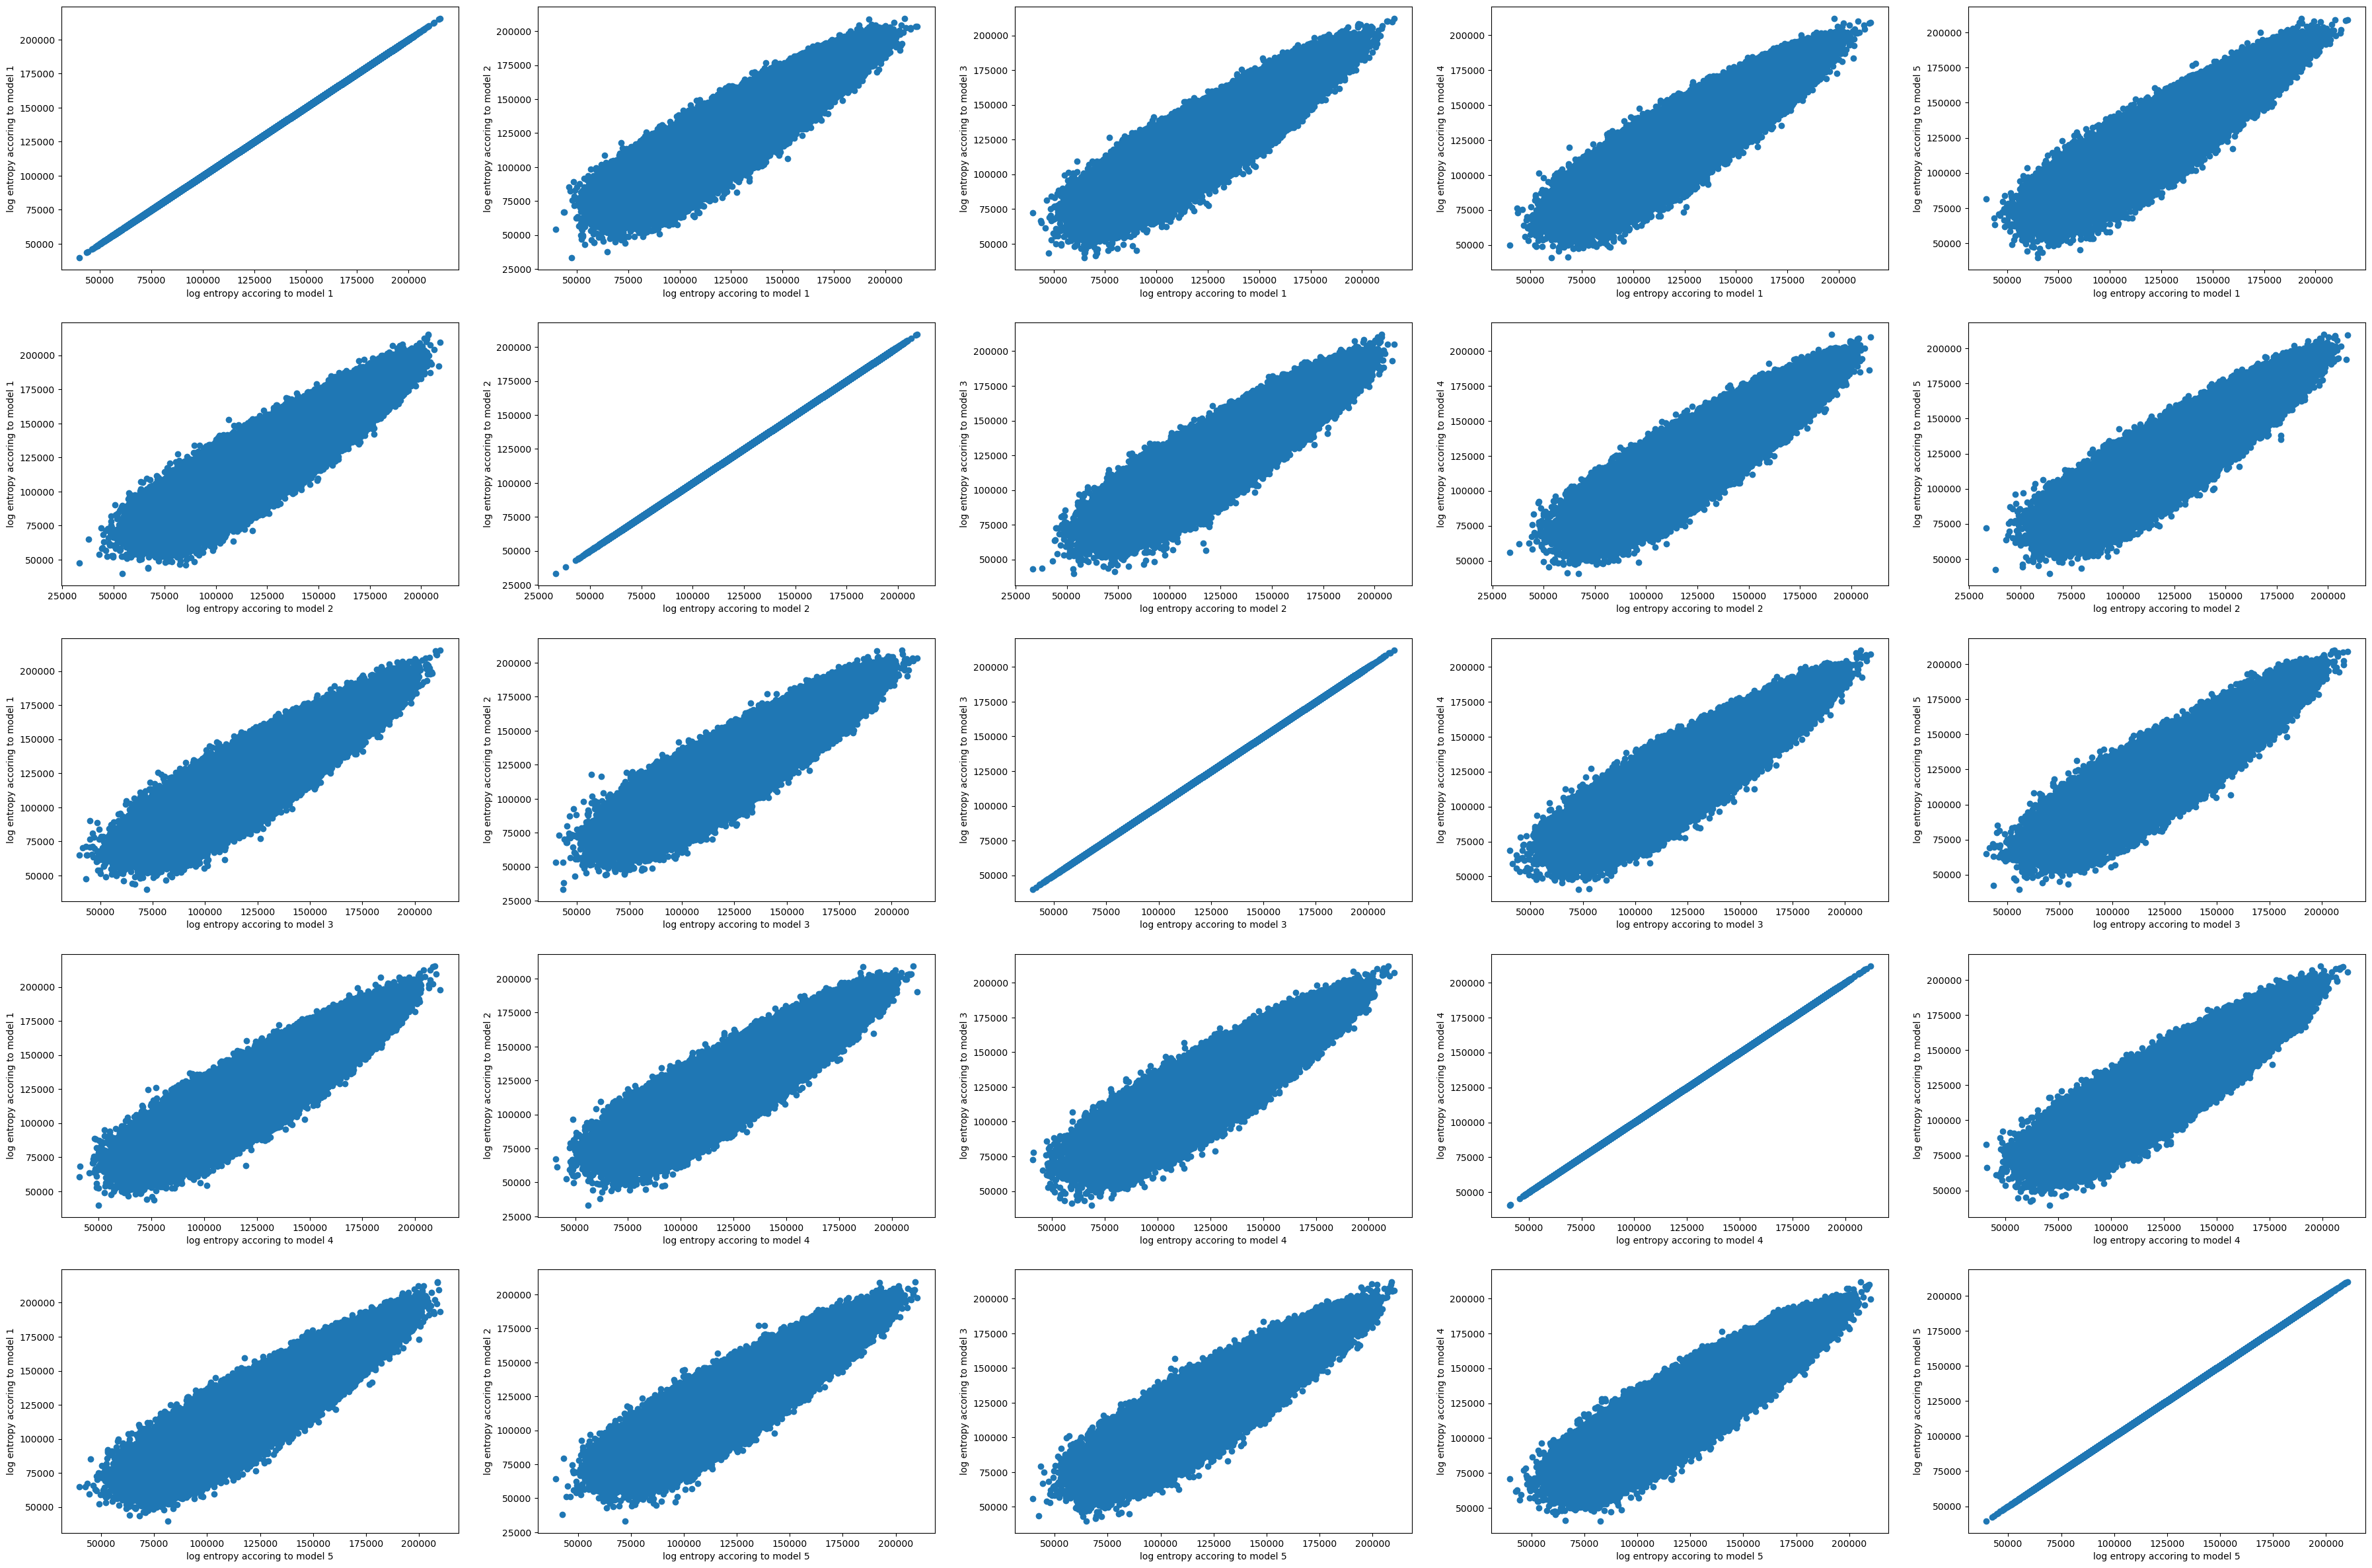

In [54]:
# x_model_index = 0
# y_model_index = 1
# make_scatter( xname=f'log(entropy according to model {x_model_index})', xvalues=log_pl_probs[x_model_index,:], yname=f'log(entropy according to model {y_model_index})', yvalues=log_pl_probs[y_model_index,:] )
fig, axs = plt.subplots(nrows=num_reps, ncols=num_reps, figsize=(9*num_reps, 6*num_reps))
for x_model_index in range(num_reps):
    x_values = depytorch(log_pl_probs[x_model_index,:])
    for y_model_index in range(num_reps):
        y_values = depytorch(log_pl_probs[y_model_index,:])
        axs[x_model_index,y_model_index].scatter(x_values, y_values)
        # axs[x_model_index,y_model_index].set_xscale('log')
        # axs[x_model_index,y_model_index].set_yscale('log')
        axs[x_model_index,y_model_index].set_xlabel(f'log entropy accoring to model {x_model_index+1}')
        axs[x_model_index,y_model_index].set_ylabel(f'log entropy accoring to model {y_model_index+1}')
        # axs.set_title(f'{xname} vs {yname}')
plt.show()

In [60]:
pl_probs = torch.exp( log_pl_probs.min(dim=-1,keepdim=True).values - log_pl_probs )
pl_probs /= pl_probs.sum(dim=-1, keepdim=True)
print('size, min, mean, max')
print( 'pseudolikelihood state probabilities', pl_probs.size(), pl_probs.min().item(), pl_probs.mean().item(), pl_probs.max().item() )
data_probs = state_counts/state_counts.sum(dim=-1, keepdim=True)
print( 'data state probabilities', data_probs.size(), data_probs.min().item(), data_probs.mean().item(), data_probs.max().item() )

size, min, mean, max
pseudolikelihood state probabilities torch.Size([5, 2844545]) 0.0 3.5155008504261787e-07 1.0
data state probabilities torch.Size([2844545]) 3.1094526775632403e-07 3.5155008504261787e-07 0.042328979820013046


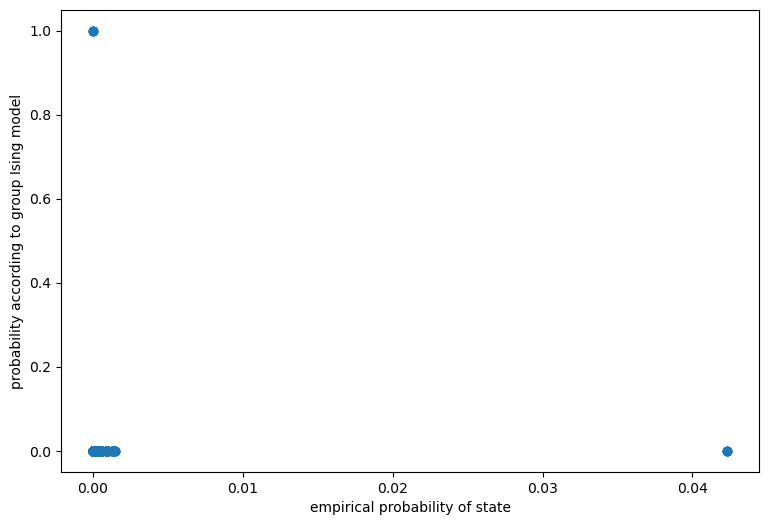

correlation between Ising model entropies and frequencies in data in log-log space
tensor([[ 1.0000e+00, -9.5576e-07, -9.5576e-07, -9.5576e-07, -9.5576e-07,
         -9.5577e-07],
        [-9.5576e-07,  1.0000e+00, -3.5163e-07, -3.5162e-07, -3.5163e-07,
         -3.5170e-07],
        [-9.5576e-07, -3.5163e-07,  1.0000e+00, -3.5160e-07, -3.5161e-07,
         -3.5168e-07],
        [-9.5576e-07, -3.5162e-07, -3.5160e-07,  1.0000e+00, -3.5160e-07,
         -3.5167e-07],
        [-9.5576e-07, -3.5163e-07, -3.5161e-07, -3.5160e-07,  1.0000e+00,
         -3.5168e-07],
        [-9.5577e-07, -3.5170e-07, -3.5168e-07, -3.5167e-07, -3.5168e-07,
          1.0000e+00]], device='cuda:0')


In [61]:
make_scatter( xname='empirical probability of state', xvalues=data_probs.unsqueeze(dim=0).repeat((num_reps,1)), yname='probability according to group Ising model', yvalues=pl_probs )
print(   f'correlation between Ising model entropies and frequencies in data in log-log space'   )
print(    torch.corrcoef(   torch.cat(  ( data_probs.unsqueeze(dim=0), pl_probs ), dim=0  )   )    )

In [15]:
print( 'states', states_float.size(), states_float.min().item(), states_float.mean().item(), states_float.max().item() )

states torch.Size([2844545, 360]) -1.0 -0.6637680530548096 1.0


In [13]:
data_mean_state = torch.matmul( state_probs.unsqueeze(dim=0), states_float ).squeeze(dim=0)
print( data_mean_state.size(), data_mean_state.min().item(), data_mean_state.mean().item(), data_mean_state.max().item() )

torch.Size([360]) -0.7173052430152893 -0.7014667987823486 -0.6867164373397827


In [14]:
data_mean_state_product = torch.matmul( state_probs.unsqueeze(dim=0) * states_float.transpose(dim0=0, dim1=1), states_float )
print( data_mean_state_product.size(), data_mean_state_product.min().item(), data_mean_state_product.mean().item(), data_mean_state_product.max().item() )

torch.Size([360, 360]) 0.48027563095092773 0.6066906452178955 0.9989325404167175


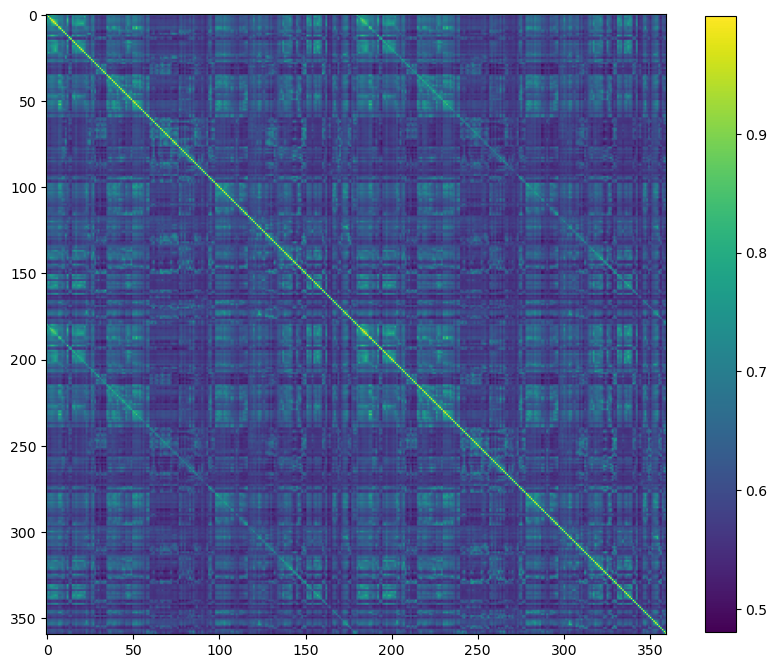

In [15]:
show_square(values=data_mean_state_product)

In [16]:
num_reps = h.size(dim=0)
field_mean_state = torch.zeros_like(h)
field_mean_state_product = torch.zeros_like(J)
for rep_index in range(num_reps):
    print(rep_index+1)
    mean_field = torch.matmul(states_float, J[rep_index,:,:])
    mean_field += h[rep_index,:].unsqueeze(dim=0)
    mean_field.tanh_()
    mean_field *= state_probs.unsqueeze(dim=-1)
    field_mean_state[rep_index,:] = mean_field.sum(dim=0)
    field_mean_state_product[rep_index,:,:] = torch.matmul( states_float.transpose(dim0=0, dim1=1), mean_field )
print( field_mean_state.size(), field_mean_state.min().item(), field_mean_state.mean().item(), field_mean_state.max().item() )
print( field_mean_state_product.size(), field_mean_state_product.min().item(), field_mean_state_product.mean().item(), field_mean_state_product.max().item() )

1
2
3
4
5
torch.Size([5, 360]) -0.7475423216819763 -0.7129507064819336 -0.6787559390068054
torch.Size([5, 360, 360]) 0.47356176376342773 0.620048463344574 0.8861050605773926


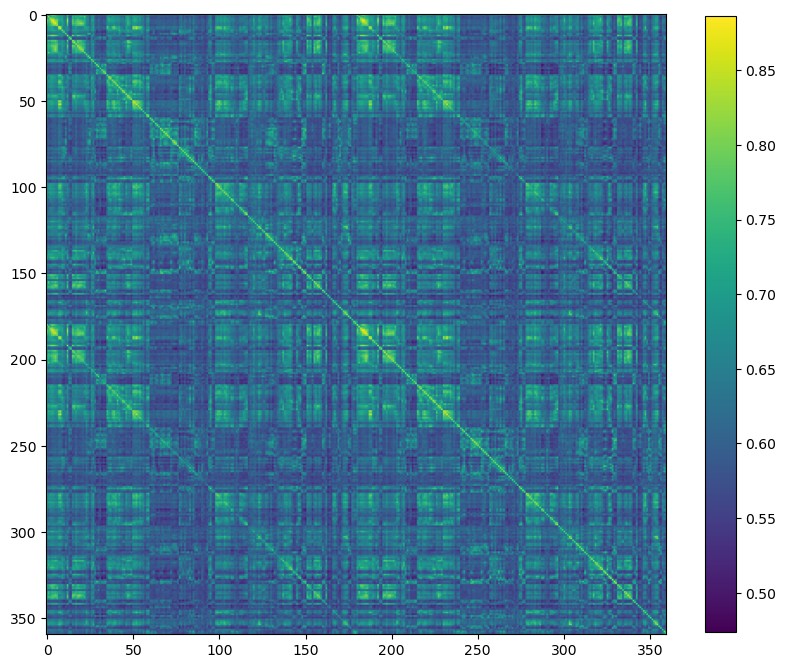

In [17]:
show_square(values=field_mean_state_product[0,:,:])

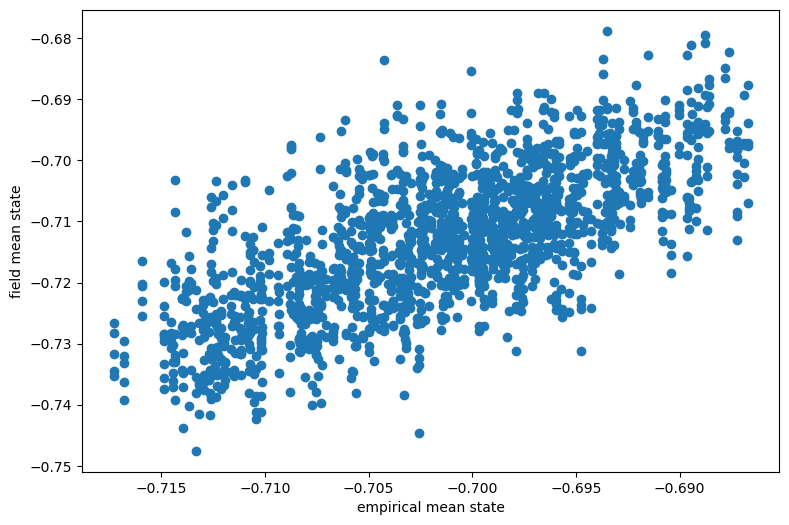

correlation between Ising model mean field and empirical mean state
tensor([[1.0000, 0.6982, 0.6936, 0.6959, 0.6825, 0.7318],
        [0.6982, 1.0000, 0.7447, 0.7149, 0.7485, 0.7440],
        [0.6936, 0.7447, 1.0000, 0.7370, 0.7337, 0.7370],
        [0.6959, 0.7149, 0.7370, 1.0000, 0.7289, 0.7640],
        [0.6825, 0.7485, 0.7337, 0.7289, 1.0000, 0.7728],
        [0.7318, 0.7440, 0.7370, 0.7640, 0.7728, 1.0000]], device='cuda:0')


In [18]:
make_scatter( xname='empirical mean state', xvalues=data_mean_state.unsqueeze(dim=0).repeat((num_reps,1)), yname='field mean state', yvalues=field_mean_state )
print(   f'correlation between Ising model mean field and empirical mean state'   )
print(    torch.corrcoef(   torch.cat(  ( data_mean_state.unsqueeze(dim=0), field_mean_state ), dim=0  )   )    )

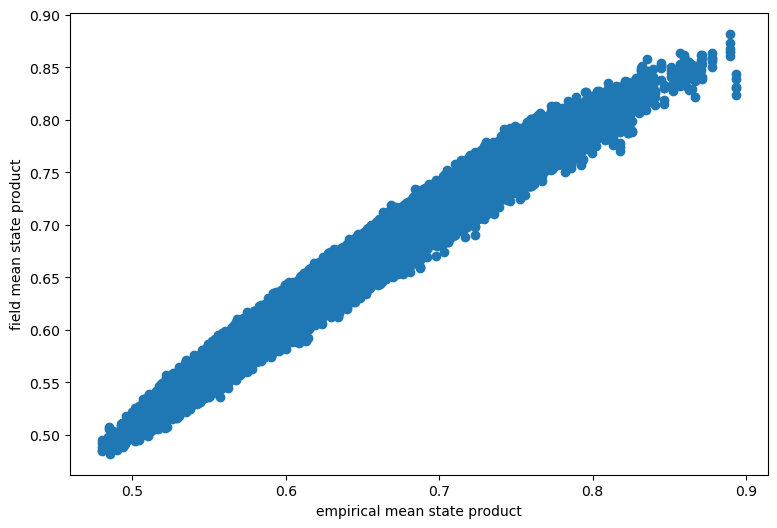

correlation between Ising model mean field product and empirical mean state product
tensor([[1.0000, 0.9843, 0.9840, 0.9842, 0.9841, 0.9839],
        [0.9843, 1.0000, 0.9736, 0.9734, 0.9734, 0.9733],
        [0.9840, 0.9736, 1.0000, 0.9734, 0.9736, 0.9732],
        [0.9842, 0.9734, 0.9734, 1.0000, 0.9735, 0.9734],
        [0.9841, 0.9734, 0.9736, 0.9735, 1.0000, 0.9733],
        [0.9839, 0.9733, 0.9732, 0.9734, 0.9733, 1.0000]], device='cuda:0')


In [19]:
num_nodes = data_mean_state_product.size(dim=-1)
triu_indices = torch.triu_indices( row=num_nodes, col=num_nodes, offset=1, dtype=int_type, device=device )
triu_rows = triu_indices[0]
triu_cols = triu_indices[1]
data_msp_triu = data_mean_state_product[triu_rows,triu_cols]
field_msp_triu = field_mean_state_product[:,triu_rows,triu_cols]
make_scatter( xname='empirical mean state product', xvalues=data_msp_triu.unsqueeze(dim=0).repeat((num_reps,1)), yname='field mean state product', yvalues=field_msp_triu )
print(   f'correlation between Ising model mean field product and empirical mean state product'   )
print(    torch.corrcoef(   torch.cat(  ( data_msp_triu.unsqueeze(dim=0), field_msp_triu ), dim=0  )   )    )

In [12]:
min_beta = 1e-09
max_beta = 1
beta_test_param_string = f'pseudolikelihood_mean_std_1_models_5_rand_min_-100_max_100_lr_0.001_steps_1000000_num_beta_837_min_1e-10_max_1_updates_1000_sim_120000_test_beta_min_{min_beta:.3g}_max_{max_beta:.3g}_sim_steps_120000'
fc_corr_file = os.path.join(file_dir, f'fc_corr_{beta_test_param_string}.pt')
fc_corr = torch.load(f=fc_corr_file)
num_beta, num_reps = fc_corr.size()
beta = torch.linspace(start=min_beta, end=max_beta, steps=num_beta, dtype=fc_corr.dtype, device=fc_corr.device)
print( f'fc_corr size ({num_beta}, {num_reps})' )

fc_corr size (837, 5)


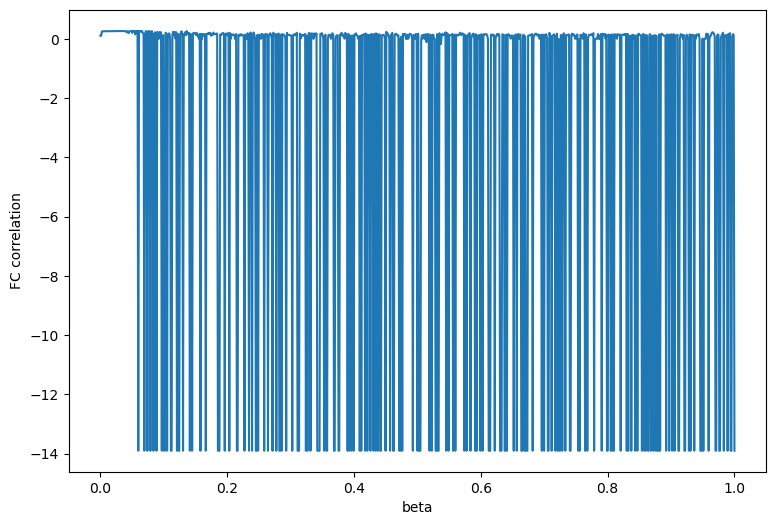

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot(  depytorch(beta), depytorch(fc_corr[:,0])  )
axs.set_xlabel('beta')
axs.set_ylabel('FC correlation')
# axs.set_title(f'{xname} vs {yname}')
plt.show()

In [18]:
fc_rmse_file = os.path.join(file_dir, f'fc_rmse_{beta_test_param_string}.pt')
fc_rmse = torch.load(f=fc_rmse_file)
print( fc_rmse.size() )

torch.Size([837, 5])


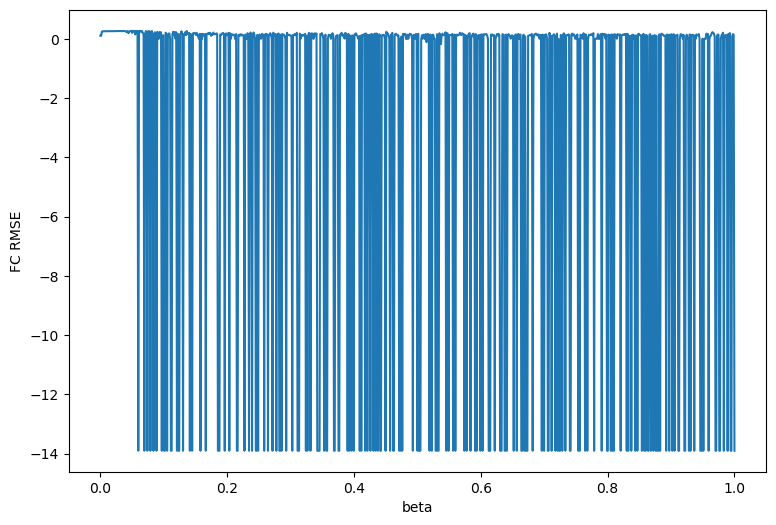

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot(  depytorch(beta), depytorch(fc_rmse[:,0])  )
axs.set_xlabel('beta')
axs.set_ylabel('FC RMSE')
# axs.set_title(f'{xname} vs {yname}')
plt.show()

In [22]:
cov_rmse_file = os.path.join(file_dir, f'cov_rmse_{beta_test_param_string}.pt')
cov_rmse = torch.load(f=cov_rmse_file)
print( cov_rmse.size() )

torch.Size([837, 5])


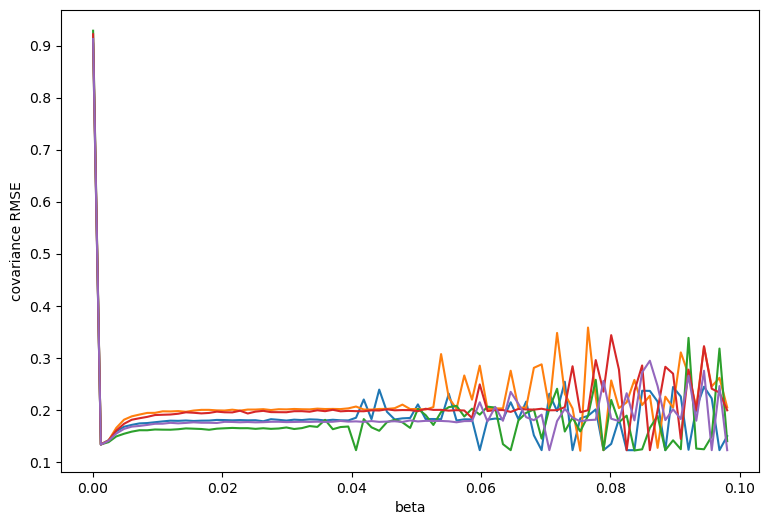

In [25]:
max_beta_index = num_beta//10
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot(  depytorch(beta[:max_beta_index]), depytorch(cov_rmse[:max_beta_index,:])  )
axs.set_xlabel('beta')
axs.set_ylabel('covariance RMSE')
# axs.set_title(f'{xname} vs {yname}')
plt.show()

In [26]:
max_beta_index = num_beta//100
print(beta[:max_beta_index])
print(cov_rmse[:max_beta_index,:])

tensor([1.0000e-09, 1.1962e-03, 2.3923e-03, 3.5885e-03, 4.7847e-03, 5.9809e-03,
        7.1770e-03, 8.3732e-03], device='cuda:0')
tensor([[0.9027, 0.9049, 0.9286, 0.9218, 0.9127],
        [0.1333, 0.1336, 0.1335, 0.1334, 0.1332],
        [0.1416, 0.1412, 0.1378, 0.1410, 0.1404],
        [0.1587, 0.1653, 0.1489, 0.1602, 0.1544],
        [0.1674, 0.1810, 0.1540, 0.1732, 0.1633],
        [0.1710, 0.1874, 0.1581, 0.1809, 0.1677],
        [0.1739, 0.1909, 0.1607, 0.1838, 0.1690],
        [0.1745, 0.1940, 0.1607, 0.1864, 0.1709]], device='cuda:0')
